In [155]:
# import libraries
# DataFrame
import pandas as pd

# plotting
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# nltk
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# sklearny
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB


#tensorflow
import tensorflow.compat.v2 as tf
import tensorflow_datasets as tfds

# Utility
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import re
import string
import pickle

# Loading Dataset

In [156]:
# Construct a tf.data.Dataset
data = pd.read_csv('training.1600000.processed.noemoticon.csv',encoding='latin', names = ['polarity','id','date','query','user','text'])

In [157]:
# Random shuffling of data, select the first 200,000
data = data.sample(frac=1)
data = data[:20000]

# Data Visualization

In [158]:
print("Dataset shape:", data.shape)

Dataset shape: (20000, 6)


In [159]:
data.head(10)

,polarity,id,date,query,user,text
1534422,4,2178762413,Mon Jun 15 08:10:12 PDT 2009,NO_QUERY,hamassa,@shellynne7 crystal might hit you for that rac...
766317,0,2299847693,Tue Jun 23 13:25:15 PDT 2009,NO_QUERY,cjessee2,Ed McMahon Passes Away at 86&lt; http://bit.l...
543202,0,2200689714,Tue Jun 16 19:14:22 PDT 2009,NO_QUERY,TheLindseyGayle,"@nicolegraziano . Ayy lovie, my procastinatin ..."
69753,0,1693406180,Sun May 03 22:27:08 PDT 2009,NO_QUERY,justy16,"Off to bed, tomorrow is Monday but then again..."
20079,0,1556996139,Sun Apr 19 01:26:13 PDT 2009,NO_QUERY,dadatina,"@totallyninja thanks, me too"
1156730,4,1979122443,Sun May 31 01:43:45 PDT 2009,NO_QUERY,bryan_kavanagh,What a cracking day. This is what iPhones are ...
1399331,4,2054221324,Sat Jun 06 06:51:36 PDT 2009,NO_QUERY,ronragsag,@thedogsdish we're playin ball right now! Emma...
1500953,4,2071284572,Sun Jun 07 19:08:36 PDT 2009,NO_QUERY,SeviDesigns,@myapronstrings My son loves it too. He was wa...
1521776,4,2176361176,Mon Jun 15 03:39:53 PDT 2009,NO_QUERY,lrnn,"@bibblybobs nooes well, maybe. we can have a ..."
1430082,4,2059848400,Sat Jun 06 17:45:31 PDT 2009,NO_QUERY,JasonMBaldwin,@dainta want to learn Heroscape?


In [160]:
data['polarity'].unique()

array([4, 0])

In [161]:
# Replacing the value 4 -->1 for ease of understanding.
data['polarity'] = data['polarity'].replace(4,1)
data.head()

,polarity,id,date,query,user,text
1534422,1,2178762413,Mon Jun 15 08:10:12 PDT 2009,NO_QUERY,hamassa,@shellynne7 crystal might hit you for that rac...
766317,0,2299847693,Tue Jun 23 13:25:15 PDT 2009,NO_QUERY,cjessee2,Ed McMahon Passes Away at 86&lt; http://bit.l...
543202,0,2200689714,Tue Jun 16 19:14:22 PDT 2009,NO_QUERY,TheLindseyGayle,"@nicolegraziano . Ayy lovie, my procastinatin ..."
69753,0,1693406180,Sun May 03 22:27:08 PDT 2009,NO_QUERY,justy16,"Off to bed, tomorrow is Monday but then again..."
20079,0,1556996139,Sun Apr 19 01:26:13 PDT 2009,NO_QUERY,dadatina,"@totallyninja thanks, me too"


In [162]:
data.describe()

,polarity,id
count,20000.000000,2.000000e+04
mean,0.499250,2.000829e+09
std,0.500012,1.919265e+08
min,0.000000,1.467811e+09
25%,0.000000,1.957371e+09
50%,0.000000,2.002709e+09
75%,1.000000,2.177446e+09
max,1.000000,2.329204e+09


In [163]:
# check the number of positive vs. negative tagged sentences
positives = data['polarity'][data.polarity == 1 ]
negatives = data['polarity'][data.polarity == 0 ]

print('Total length of the data is:         {}'.format(data.shape[0]))
print('No. of positve tagged sentences is:  {}'.format(len(positives)))
print('No. of negative tagged sentences is: {}'.format(len(negatives)))

Total length of the data is:         20000
No. of positve tagged sentences is:  9985
No. of negative tagged sentences is: 10015


In [164]:
# get a word count per of text
def word_count(words):
    return len(words.split())

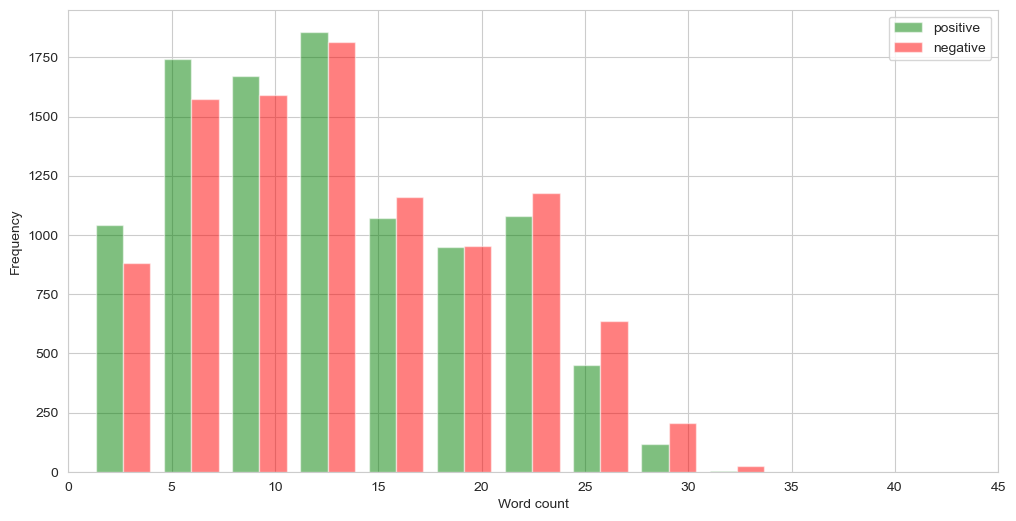

In [165]:
# plot word count distribution for both positive and negative

data['word count'] = data['text'].apply(word_count)
p = data['word count'][data.polarity == 1]
n = data['word count'][data.polarity == 0]
plt.figure(figsize=(12,6))
plt.xlim(0,45)
plt.xlabel('Word count')
plt.ylabel('Frequency')
g = plt.hist([p, n], color=['g','r'], alpha=0.5, label=['positive','negative'])
plt.legend(loc='upper right')

In [166]:
# get common words in training dataset
from collections import Counter
all_words = []
for line in list(data['text']):
    words = line.split()
    for word in words:
      if(len(word)>2):
        all_words.append(word.lower())


Counter(all_words).most_common(20)

[('the', 6408),
 ('and', 3734),
 ('you', 3044),
 ('for', 2638),
 ('have', 1813),
 ('that', 1636),
 ('but', 1616),
 ("i'm", 1519),
 ('just', 1506),
 ('with', 1461),
 ('not', 1292),
 ('was', 1236),
 ('this', 1074),
 ('get', 1015),
 ('are', 968),
 ('like', 947),
 ('good', 921),
 ('all', 907),
 ('out', 858),
 ('your', 820)]

<Axes: xlabel='polarity', ylabel='count'>

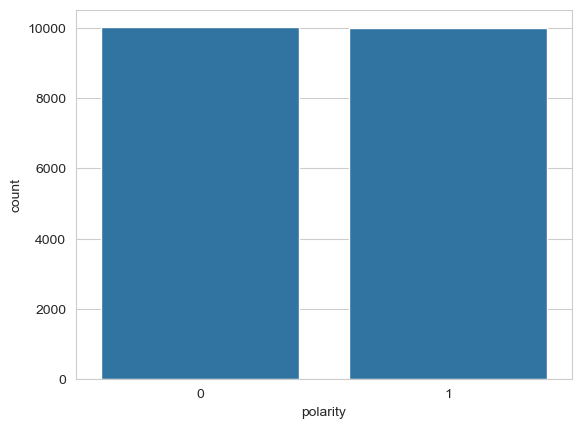

In [167]:
%matplotlib inline
sns.countplot(x=data['polarity'])

# Data Processing
## The Preprocessing steps taken are:
1. Lower Casing: Each text is converted to lowercase.
2. Removing URLs: Links starting with "http" or "https" or "www" are replaced by "".

3. Removing Usernames: Replace @Usernames with word "". (eg: "@XYZ" to "")

4. Removing Short Words: Words with length less than 2 are removed.
5. Removing Stopwords: Stopwords are the English words which does not add much meaning to a sentence. They can safely be ignored without sacrificing the meaning of the sentence. (eg: "the", "he", "have")
6. Lemmatizing: Lemmatization is the process of converting a word to its base form. (e.g: “wolves” to “wolf”)

In [168]:
# Removing the unnecessary columns.
data.drop(['date','query','user','word count'], axis=1, inplace=True)

In [169]:
data.drop('id', axis=1, inplace=True)
data.head(10)

,polarity,text
1534422,1,@shellynne7 crystal might hit you for that rac...
766317,0,Ed McMahon Passes Away at 86&lt; http://bit.l...
543202,0,"@nicolegraziano . Ayy lovie, my procastinatin ..."
69753,0,"Off to bed, tomorrow is Monday but then again..."
20079,0,"@totallyninja thanks, me too"
1156730,1,What a cracking day. This is what iPhones are ...
1399331,1,@thedogsdish we're playin ball right now! Emma...
1500953,1,@myapronstrings My son loves it too. He was wa...
1521776,1,"@bibblybobs nooes well, maybe. we can have a ..."
1430082,1,@dainta want to learn Heroscape?


In [170]:
#Checking if any null values present
(data.isnull().sum() / len(data))*100

polarity    0.0
text        0.0
dtype: float64

In [171]:
#convrting pandas object to a string type
data['text'] = data['text'].astype('str')

In [172]:
nltk.download('stopwords')
stopword = set(stopwords.words('english'))
print(stopword)

{'with', 'had', 'should', 'that', 'himself', 'll', "it's", 'but', 'same', 'of', 'both', 'ma', "we'll", 'out', 'hasn', 'd', 'for', 'if', 'into', 'their', 'are', "she's", 'him', "we'd", 'once', "wouldn't", 'having', "i'm", 'or', 'there', 'few', "aren't", "shan't", 's', 'aren', 'each', 'so', 'other', 'some', 'through', 'his', "he'll", 'such', 'yourself', "you've", 'these', 'can', "should've", 'your', 'most', 'too', 'them', 'as', "he's", 'after', 'by', 'under', 'i', 'off', 'we', 'ourselves', "weren't", 'again', "they've", 'wouldn', 'why', 'all', "i'll", "you'd", "wasn't", 'itself', 'during', 'theirs', "didn't", 'yours', 'between', "doesn't", "i'd", "i've", 'our', 'just', 'weren', 'couldn', 'her', 'needn', 'and', "haven't", 'hadn', "don't", 'over', 'be', 'isn', "couldn't", 'what', "mustn't", 'is', 'below', 'any', 'have', 'does', "she'd", 'about', "she'll", "hasn't", "that'll", 'ain', 'then', 'how', 'own', 'didn', 'in', 'haven', 'themselves', 'nor', 'she', "they're", "you'll", 'me', 'will', 

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/zhaijingjing/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [173]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/zhaijingjing/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/zhaijingjing/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/zhaijingjing/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [174]:
urlPattern = r"((http://)[^ ]*|(https://)[^ ]*|( www\.)[^ ]*)"
userPattern = '@[^\s]+'
def process_tweets(tweet):
  # Lower Casing
    tweet = tweet.lower()
    #tweet=tweet[1:]
    # Removing all URls
    tweet = re.sub(urlPattern,'',tweet)
    # Removing all @username.
    tweet = re.sub(userPattern,'', tweet)
    #Remove punctuations
    tweet = tweet.translate(str.maketrans("","",string.punctuation))
    #tokenizing words
    tokens = word_tokenize(tweet)
    #Removing Stop Words
    negation_words = {"no", "nor", "not", "don", "don't", "didn", "didn't", "doesn", "doesn't", "can't", "cannot", "won't", "wouldn", "wouldn't", "shouldn", "shouldn't", "isn't", "aren't", "wasn't", "weren't"}

    # Remove negation words from the stop word list
    custom_stop_words = stopword.difference(negation_words)

    final_tokens = [w for w in tokens if w not in custom_stop_words]
    #final_tokens = tokens
    #reducing a word to its word stem
    wordLemm = WordNetLemmatizer()
    finalwords=[]
    for w in final_tokens:
      if len(w)>1:
        word = wordLemm.lemmatize(w)
        finalwords.append(word)
    return ' '.join(finalwords)

In [175]:
data['processed_tweets'] = data['text'].apply(lambda x: process_tweets(x))
print('Text Preprocessing complete.')

Text Preprocessing complete.


In [176]:
data.head(10)

,polarity,text,processed_tweets
1534422,1,@shellynne7 crystal might hit you for that rac...,crystal might hit rachel ray comment
766317,0,Ed McMahon Passes Away at 86&lt; http://bit.l...,ed mcmahon pass away 86lt via
543202,0,"@nicolegraziano . Ayy lovie, my procastinatin ...",ayy lovie procastinatin as hasnt got tikk elec...
69753,0,"Off to bed, tomorrow is Monday but then again...",bed tomorrow monday one day closer mother day
20079,0,"@totallyninja thanks, me too",thanks
1156730,1,What a cracking day. This is what iPhones are ...,cracking day iphones pestering ppl online enjo...
1399331,1,@thedogsdish we're playin ball right now! Emma...,playin ball right emma say woofabulous
1500953,1,@myapronstrings My son loves it too. He was wa...,son love watching earlier
1521776,1,"@bibblybobs nooes well, maybe. we can have a ...",nooes well maybe barbeque back garden
1430082,1,@dainta want to learn Heroscape?,want learn heroscape


# RNN - LSTM

In [177]:
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, Dropout
from sklearn.feature_extraction.text import CountVectorizer
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
import re
import keras
from keras import regularizers
from keras.models import Sequential
from keras import layers
from keras import regularizers
from keras import backend as K
from keras.callbacks import ModelCheckpoint


## Hyperparameters

In [178]:
num_epochs = 10
results = {}
params_history = {}
# Define the maximum length of each sequence (number of words per tweet)
max_len = 200

# hidden layer
hidden_units = 8

# LSTM layer
LSTM_units = 32


# Embedding layer
# Define the 5000 most common words
# max_words = 5000
# embedding_dim = 64
input_dims = [1000, 2000, 5000, 8000, 10000]  # 词汇量
output_dims = [16, 32, 64, 128]  # Embedding 维度

## Creating and Traning LSTM Model

In [179]:
def create_lstm_model(input_dim, output_dim):
    model = Sequential()
    model.add(layers.Embedding(input_dim=input_dim, output_dim=output_dim))
    model.add(layers.LSTM(LSTM_units, dropout=0.5))
    model.add(layers.Dense(hidden_units, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [180]:
models = {}
for input_dim in input_dims:
    for output_dim in output_dims:
        print(f"Training model with input_dim={input_dim}, output_dim={output_dim}...")

        # 重新创建 Tokenizer，确保只保留 input_dim 个最常见单词
        tokenizer = Tokenizer(num_words=input_dim)
        tokenizer.fit_on_texts(data.processed_tweets)
        sequences = tokenizer.texts_to_sequences(data.processed_tweets)
        tweets = pad_sequences(sequences, maxlen=max_len)

        # 划分数据集
        train_data, test_data, train_label, test_label = train_test_split(tweets, data.polarity.values, test_size=0.2, random_state=101)

        model = create_lstm_model(input_dim, output_dim)

        history = model.fit(
            train_data, train_label,
            epochs=num_epochs,
            validation_data=(test_data, test_label),
            verbose=2
        )

        results[(input_dim, output_dim)] = {
            'train_acc': history.history['accuracy'][-1],
            'test_acc': history.history['val_accuracy'][-1]
        }

        params_history[(input_dim, output_dim)] = model.count_params()
        models[(input_dim, output_dim)] = model

Training model with input_dim=1000, output_dim=16...
Epoch 1/10
500/500 - 18s - 36ms/step - accuracy: 0.6579 - loss: 0.6090 - val_accuracy: 0.7297 - val_loss: 0.5393
Epoch 2/10
500/500 - 31s - 61ms/step - accuracy: 0.7576 - loss: 0.5099 - val_accuracy: 0.7327 - val_loss: 0.5375
Epoch 3/10
500/500 - 396s - 792ms/step - accuracy: 0.7691 - loss: 0.4950 - val_accuracy: 0.7283 - val_loss: 0.5484
Epoch 4/10
500/500 - 13s - 27ms/step - accuracy: 0.7707 - loss: 0.4891 - val_accuracy: 0.7325 - val_loss: 0.5379
Epoch 5/10
500/500 - 210s - 420ms/step - accuracy: 0.7777 - loss: 0.4827 - val_accuracy: 0.7368 - val_loss: 0.5353
Epoch 6/10
500/500 - 13s - 26ms/step - accuracy: 0.7757 - loss: 0.4812 - val_accuracy: 0.7343 - val_loss: 0.5424
Epoch 7/10
500/500 - 5380s - 11s/step - accuracy: 0.7802 - loss: 0.4778 - val_accuracy: 0.7330 - val_loss: 0.5379
Epoch 8/10
500/500 - 14s - 27ms/step - accuracy: 0.7807 - loss: 0.4765 - val_accuracy: 0.7340 - val_loss: 0.5365
Epoch 9/10
500/500 - 14s - 28ms/step -

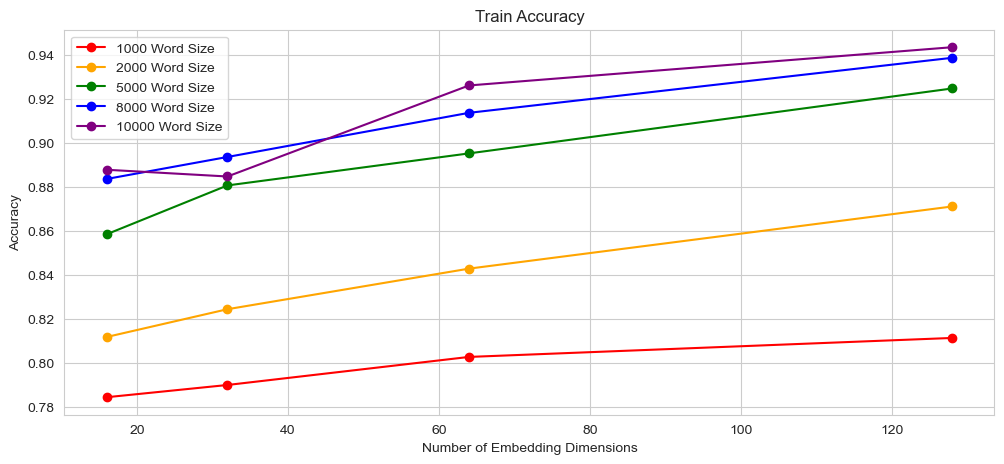

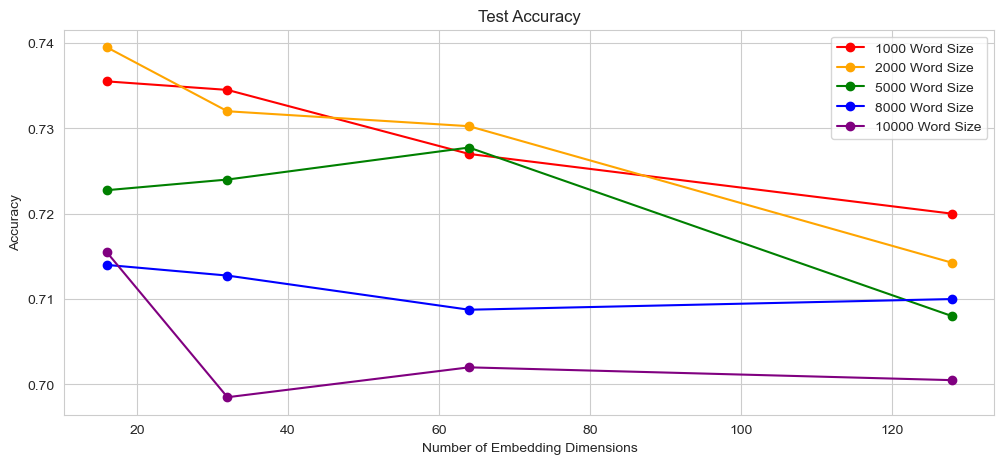

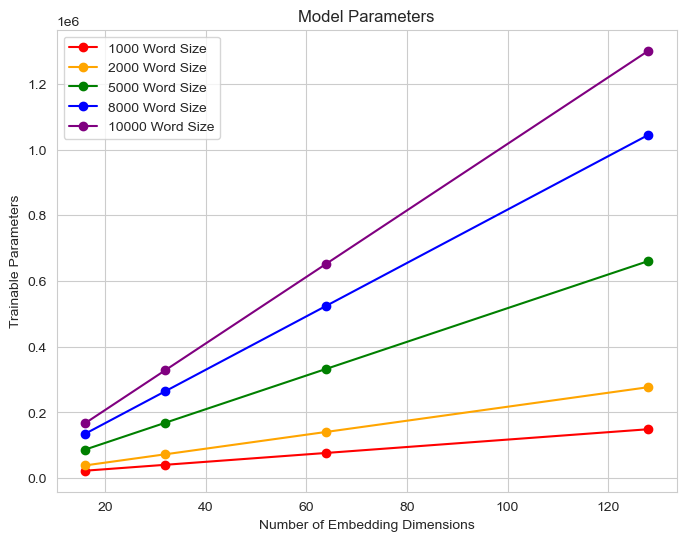

In [181]:
colors = ['red', 'orange', 'green', 'blue', 'purple', 'brown', 'pink', 'gray', 'cyan', 'magenta']
# --- 训练精度折线图 ---
plt.figure(figsize=(12, 5))
for i, input_dim in enumerate(input_dims):
    train_acc = [results[(input_dim, output_dim)]['train_acc'] for output_dim in output_dims]
    plt.plot(output_dims, train_acc, marker='o', linestyle='-', color=colors[i], label=f"{input_dim} Word Size")
plt.xlabel("Number of Embedding Dimensions")
plt.ylabel("Accuracy")
plt.title("Train Accuracy")
plt.legend()
plt.show()

# --- 测试精度折线图 ---
plt.figure(figsize=(12, 5))
for i, input_dim in enumerate(input_dims):
    test_acc = [results[(input_dim, output_dim)]['test_acc'] for output_dim in output_dims]
    plt.plot(output_dims, test_acc, marker='o', linestyle='-', color=colors[i], label=f"{input_dim} Word Size")
plt.xlabel("Number of Embedding Dimensions")
plt.ylabel("Accuracy")
plt.title("Test Accuracy")
plt.legend()
plt.show()

# --- 参数量变化折线图 ---
plt.figure(figsize=(8, 6))
for i, input_dim in enumerate(input_dims):
    params = [params_history[(input_dim, output_dim)] for output_dim in output_dims]
    plt.plot(output_dims, params, marker='o', linestyle='-', color=colors[i], label=f"{input_dim} Word Size")
plt.xlabel("Number of Embedding Dimensions")
plt.ylabel("Trainable Parameters")
plt.title("Model Parameters")
plt.legend()
plt.show()

